# Advanced Swarmpy

<a href="https://www.python.org/downloads/release/python-3100/" 
target="_blank"><img src="https://img.shields.io/badge/python-3.10-blue.svg" alt="Python Version" /></a>

___

Combining pipeline, masks and ant parameter randomization

The goal here is to warmstart the pheromone trails by applying ACO to a partition of the graph. Therefore we use intermediate pipelines with mask and eventually apply iterations on the entire problem

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
os.chdir('..')

from swarmpy_tsp import *


In [2]:
G, opt_score = Antcoder('test_set/ch130')

In [3]:
mask = np.ones_like(G['e'], dtype=bool)
mid = int(G['e'].shape[0]/2)
mask[:mid, :mid] = 0

In [4]:
aco_with_Daemon1 = ACO_Pipeline(
    [
        ("Planner", RandomizedPlanner(alpha_bounds=[1.0,1.0], beta_bounds=[1.0,6.0], ant_params={'mask':mask})),
        ("Sol", SolutionConstructor()),
        ("Updater", BestTourPheromonesUpdater(bounds=[0.4,.6])),
 ], iter_max=10, as_step=True
)

aco_with_Daemon2 = ACO_Pipeline(
    [
        ("Planner", RandomizedPlanner(alpha_bounds=[1.0,1.0], beta_bounds=[1.0,6.0], ant_params={'mask':~mask})),
        ("Sol", SolutionConstructor()),
        ("Updater", BestTourPheromonesUpdater(bounds=[0.4,.6])),
        
 ], iter_max=10, as_step=True
)

aco_final = ACO_Pipeline(
    [
        ("Planner", RandomizedPlanner(alpha_bounds=[1.0,1.0], beta_bounds=[1.0,6.0])),
        ("Sol", SolutionConstructor()),
        ("DA", DaemonActions()),
        ("Updater", BestTourPheromonesUpdater(bounds=[0.1,1])),
        
 ], iter_max=30, last_step=True
)

optimus_prime_pipeline = ACO_Pipeline([('a', aco_with_Daemon1), ('b',aco_with_Daemon2), ('d',aco_final)], iter_max=1, metapipeline=True)

solutions_w_daemon = optimus_prime_pipeline.run(G=G,)



SwarmPy |Step| Score : 5030.783171200779: 100%|██████████| 10/10 [00:07<00:00,  1.39it/s]
SwarmPy |Step| Score : 4732.78379046346: 100%|██████████| 10/10 [00:07<00:00,  1.42it/s]
SwarmPy |Final Step| Score : 6529.087005572461: 100%|██████████| 30/30 [00:43<00:00,  1.44s/it]
SwarmPy | Score : 6529.087005572461: 100%|██████████| 1/1 [00:57<00:00, 57.44s/it]


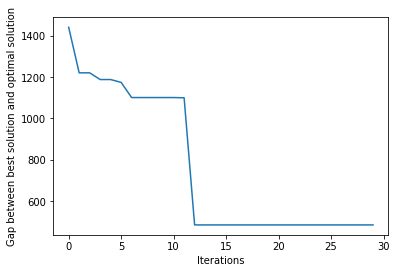

In [5]:
scores_w_daemon = np.array([el[1] for el in solutions_w_daemon['solutions']]) - opt_score

plt.plot(scores_w_daemon)
plt.xlabel('Iterations')
plt.ylabel('Gap between best solution and optimal solution')
plt.show()